In [98]:
number = input  ('write a number in base 10:')
dec=int(number)

print("The decimal value of", dec, "is:")
print(bin(dec)[2:], "in binary.")
print(oct(dec)[2:], "in octal.")
print(hex(dec)[2:], "in hexadecimal.")

write a number in base 10:3
The decimal value of 3 is:
11 in binary.
3 in octal.
3 in hexadecimal.


In [67]:
import pandas as pd
cast = pd.read_csv(r"C:\Users\שירה טיירי\Desktop\מטלת גמר מדעי הנתונים\cast.csv")
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [68]:
# 1) How many movies have the title "Hamlet"?
cast[cast.title=='Hamlet'].drop_duplicates(subset=['year']).shape[0] 
# find the title Hamlet
# I sifted duplicates of years because this is the same movie (only with a different actor)
# find How many movies have the title "Hamlet"

17

In [69]:
# 2) List all of the "Treasure Island" movies from earliest to most recent.
cast[cast.title=='Treasure Island'].drop_duplicates(subset=['year']).sort_values('year', ascending=True)
# find the title Hamlet
# I sifted duplicates of years because this is the same movie (only with a different actor)
# sorts the relevant values

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


In [70]:
# 3) How many roles were credited in the silent 1921 version of Hamlet?
Hamlet= cast[cast.title=='Hamlet']      #find the title Hamlet
Hamlet1921= (Hamlet.year==1921).sum()   #take the relevant year and summarizes 
Hamlet1921

9

<AxesSubplot:title={'center':'Number of "Hamlet" films made each decade'}, xlabel='year'>

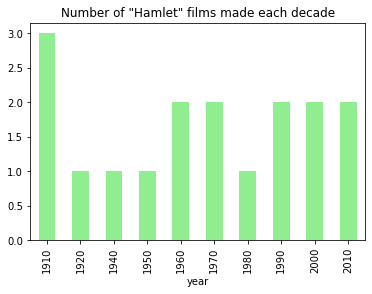

In [71]:
# 4) Use groupby() to plot the number of "Hamlet" films made each decade
Hamlet = cast[cast.title=='Hamlet'].drop_duplicates(subset=['year'])
Hamlet.groupby(Hamlet.year // 10 * 10).size().plot(kind='bar', color= 'lightgreen', title='Number of "Hamlet" films made each decade')
# find the title Hamlet
# I sifted duplicates of years because this is the same movie (only with a different actor)
# showing a number of "Hamlet" films shot each decade

In [72]:
# 5) How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
cast[(cast.year>=1950) & (cast.year<1960) & (cast.n==1)].sort_values('year', ascending=True).groupby(['year','type']).size()
# take the relevant year and the leading role, sort tham, and make a list of the numbers of actor and actress 

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

In [82]:
# 6) List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
actLead= cast[(cast.year>=1990) & (cast.n==1)]                             # take the relevant year and the leading role
actLead.groupby(actLead.name).size().sort_values(ascending=False).head(10) # Consolidation of names and the number of times the same name appeared, sorting from the largest to the smallest and taking the first ten

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

In [96]:
# 7) List, in order by year, each of the films in which Frank Oz has played more than 1 role
FOz= cast[cast.name == "Frank Oz"]         # take the relevant row according the name
FOz= FOz.groupby(['year','title']).size()  # Consolidation of same years and titles and the amount of each one.
FOz[FOz >1]                                # Because we were asked for more than one position

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64